In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [2]:
path = '/kaggle/input/sales-store-overview/SalesStore.csv'

In [3]:
data = pd.read_csv(path)

In [4]:
data.head(3)

,Order_Date,Ship_Date,Ship_Mode,Postal_Code,Region,Product_Reference,Category,Sub_Category,Sales,Quantity,Profit,State
0,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10022901,Office Supplies,Tape,5,1,0.15,OH
1,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10023012,Office Supplies,Tape,5,1,0.15,OH
2,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10002828,Office Supplies,Tape,5,1,0.15,OH


In [5]:
data.duplicated().sum()

54

In [6]:
data = data.drop_duplicates()

In [7]:
data.duplicated().sum()

0

In [8]:
data['State'].value_counts()

State
OH    24
IL    24
DC    24
TX    22
FL    16
GA    16
UT    16
CA    13
WA     7
Name: count, dtype: int64

In [9]:
data = data.drop(['Order_Date','Ship_Date' , 'Product_Reference' ,'Postal_Code'] ,axis = 1)

In [10]:
data.head(3)

,Ship_Mode,Region,Category,Sub_Category,Sales,Quantity,Profit,State
0,Ground,Midwest,Office Supplies,Tape,5,1,0.15,OH
1,Ground,Midwest,Office Supplies,Tape,5,1,0.15,OH
2,Ground,Midwest,Office Supplies,Tape,5,1,0.15,OH


In [11]:
from sklearn.preprocessing import LabelEncoder
leb= LabelEncoder()

In [12]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = leb.fit_transform(data[col])

In [13]:
data.head()

,Ship_Mode,Region,Category,Sub_Category,Sales,Quantity,Profit,State
0,1,1,2,31,5,1,0.15,5
1,1,1,2,31,5,1,0.15,5
2,1,1,2,31,5,1,0.15,5
4,1,1,2,31,5,1,0.15,5
5,0,2,0,19,500,2,10.00,6


<Axes: xlabel='State', ylabel='count'>

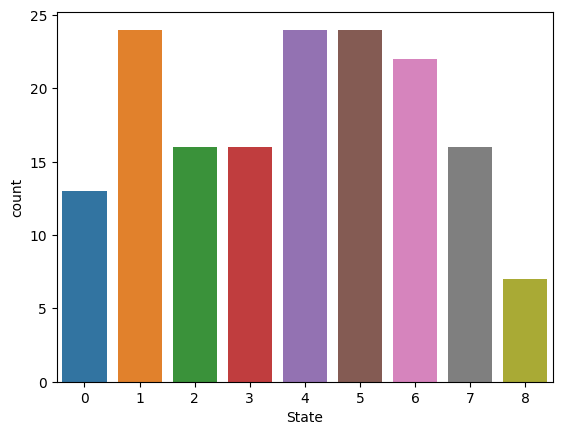

In [14]:
sn.countplot(data , x= data['State'])

In [15]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

In [16]:
x = data.drop(['State'] ,axis = 1)
y =data['State']

In [17]:
x,y = ros.fit_resample(x,y)

In [18]:
y.value_counts()

State
5    24
6    24
2    24
3    24
7    24
0    24
4    24
1    24
8    24
Name: count, dtype: int64

Text(0, 0.5, 'counts')

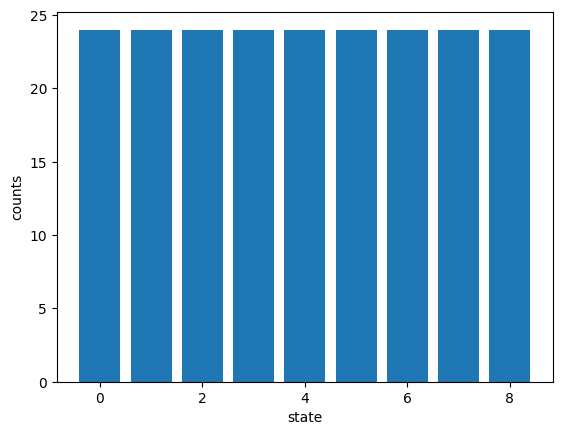

In [19]:
plt.bar(y.value_counts().index, y.value_counts())
plt.xlabel('state')
plt.ylabel('counts')

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dtc = DecisionTreeClassifier()
rnd = RandomForestClassifier()

In [21]:
xtrain , xtest ,ytrain ,ytest = train_test_split(x,y ,random_state=41 , test_size=.30)

In [22]:
xtrain.shape

(151, 7)

In [23]:
ytrain.shape

(151,)

In [24]:
dtc.fit(xtrain , ytrain)
rnd.fit(xtrain , ytrain)

RandomForestClassifier()

In [25]:
dtc_train_score = dtc.score(xtrain , ytrain)
rnd_train_score = rnd.score(xtrain , ytrain)

In [26]:
print(dtc_train_score ,rnd_train_score)

1.0 1.0


In [27]:
dtc_test_score = dtc.score(xtest , ytest)
rnd_test_score = rnd.score(xtest , ytest)

In [28]:
dtc_test_score

1.0

In [29]:
rnd_test_score

1.0

In [30]:
model_name = ['DecisionTreeClassifier' , 'RandomForestClassifier' ]
train_score = [dtc_train_score , rnd_train_score]
test_score = [dtc_test_score , rnd_test_score]

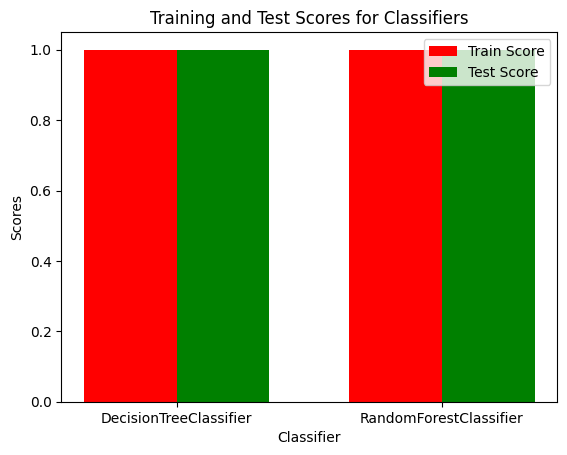

In [31]:
bar_width = 0.35  # Width of the bars
index = np.arange(len(model_name))  # X-axis values

plt.bar(index, train_score, bar_width, label='Train Score', color='red')
plt.bar(index + bar_width, test_score, bar_width, label='Test Score', color='green')

plt.xlabel('Classifier')
plt.ylabel('Scores')
plt.title('Training and Test Scores for Classifiers')
plt.xticks(index + bar_width / 2, model_name)  # Set x-axis ticks at the center of each group
plt.legend()

plt.show()

In [32]:
from sklearn.metrics import classification_report , confusion_matrix

In [33]:
print(classification_report(ytest , dtc.predict(xtest)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00        13

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



In [34]:
print(classification_report(ytest , rnd.predict(xtest)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00        13

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



In [35]:
cm = confusion_matrix(ytest , rnd.predict(xtest))

In [36]:
cm

array([[ 6,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  7,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 11,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  7,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 13]])

<Axes: >

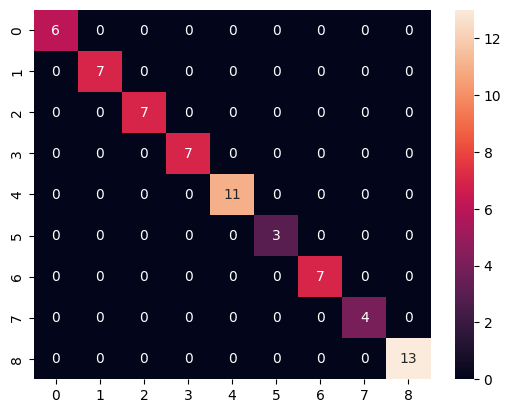

In [37]:
sn.heatmap(cm , annot =True)